<a href="https://colab.research.google.com/github/StuckInAnEndlessFebruary/Image_processing_homework/blob/main/Image_processing_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# سوال 1

## مرحله ۱: اتصال به Google Drive و آماده‌سازی مسیرها

In [2]:
from google.colab import drive
import os

# اتصال به گوگل درایو
drive.mount('/content/drive')

# مسیر پوشه تصاویر
image_dir = '/content/drive/MyDrive/cv/Q1/'

# بررسی فایل‌ها
os.listdir(image_dir)


Mounted at /content/drive


['processed_img_part_2.jpg',
 'processed_img_part_3_Level_0.jpg',
 'processed_img_part_3_Level_1.jpg',
 'processed_img_part_3_Level_2.jpg',
 'processed_img_part_3_Level_3.jpg',
 'processed_img_part_3_Level_4.jpg',
 'processed_img_part_4.jpg',
 'processed_img_part_1.jpg']

## مرحله ۲: نمایش اولیه تصاویر برای تحلیل نوع آسیب

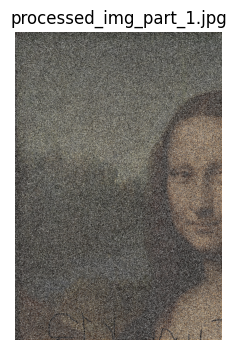

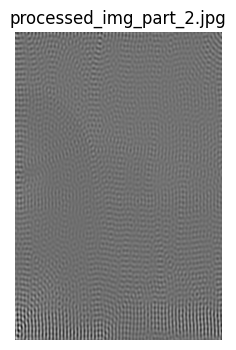

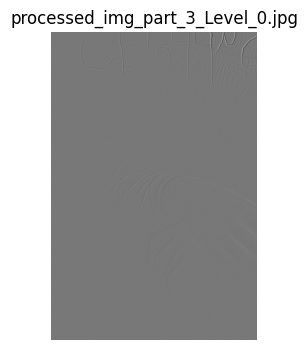

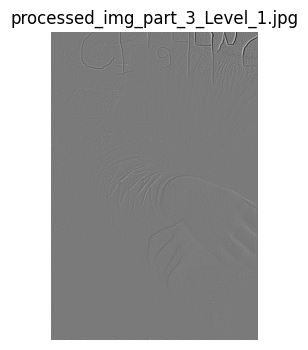

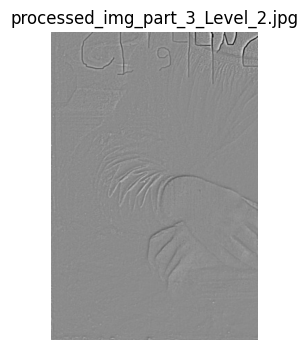

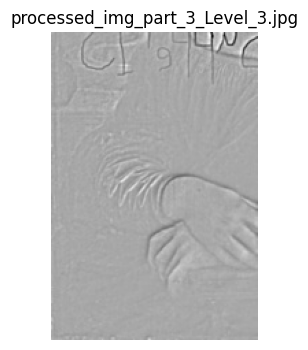

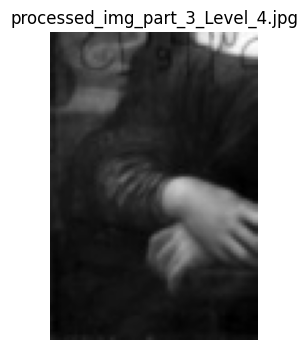

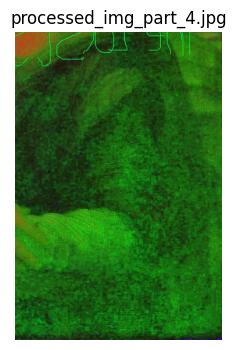

In [4]:
import cv2
import matplotlib.pyplot as plt

# لیست فایل‌ها
# لیست صحیح فایل‌ها با پسوند
image_files = [
    'processed_img_part_1.jpg',
    'processed_img_part_2.jpg',
    'processed_img_part_3_Level_0.jpg',
    'processed_img_part_3_Level_1.jpg',
    'processed_img_part_3_Level_2.jpg',
    'processed_img_part_3_Level_3.jpg',
    'processed_img_part_3_Level_4.jpg',
    'processed_img_part_4.jpg'
]


# تابع نمایش تصویر
def show_image(img_path, title):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # از BGR به RGB
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# نمایش همه تصاویر
for file in image_files:
    show_image(os.path.join(image_dir, file), file)


## مرحله ۳: فیلتر کردن نویز قطعه اول

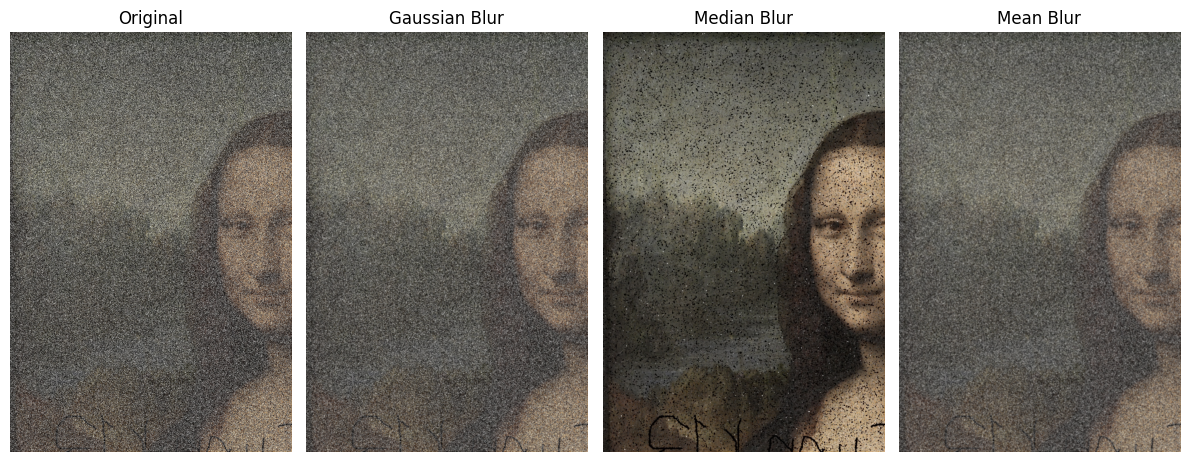

In [5]:
# بارگذاری تصویر 1
img1_path = os.path.join(image_dir, 'processed_img_part_1.jpg')
img1 = cv2.imread(img1_path, cv2.IMREAD_COLOR)

# اعمال فیلترها
blur_gaussian = cv2.GaussianBlur(img1, (5, 5), 0)
blur_median = cv2.medianBlur(img1, 5)
blur_mean = cv2.blur(img1, (5, 5))

# نمایش نتایج
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(blur_gaussian, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(blur_median, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(blur_mean, cv2.COLOR_BGR2RGB))
plt.title("Mean Blur")
plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
# مسیر ذخیره نسخه‌ی پاک شده
output_path_img1 = os.path.join(image_dir, 'denoised_img_part_1.jpg')

# ذخیره تصویر
cv2.imwrite(output_path_img1, blur_median)
print("تصویر قطعه 1 با موفقیت ذخیره شد.")


تصویر قطعه 1 با موفقیت ذخیره شد.


## مرحله ۴: پاکسازی نویز از قطعه دوم با استفاده از حوزه فرکانس (Fourier Transform)

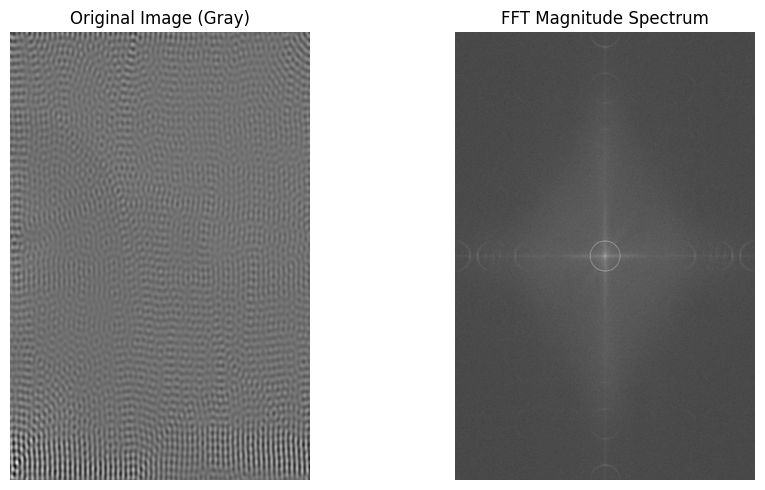

In [7]:
import numpy as np

# بارگذاری تصویر دوم
img2_path = os.path.join(image_dir, 'processed_img_part_2.jpg')
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)  # برای FFT بهتره سیاه‌وسفید باشه

# اعمال FFT
f = np.fft.fft2(img2)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

# نمایش تصویر اصلی و طیف فرکانسی
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title("Original Image (Gray)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("FFT Magnitude Spectrum")
plt.axis('off')

plt.tight_layout()
plt.show()


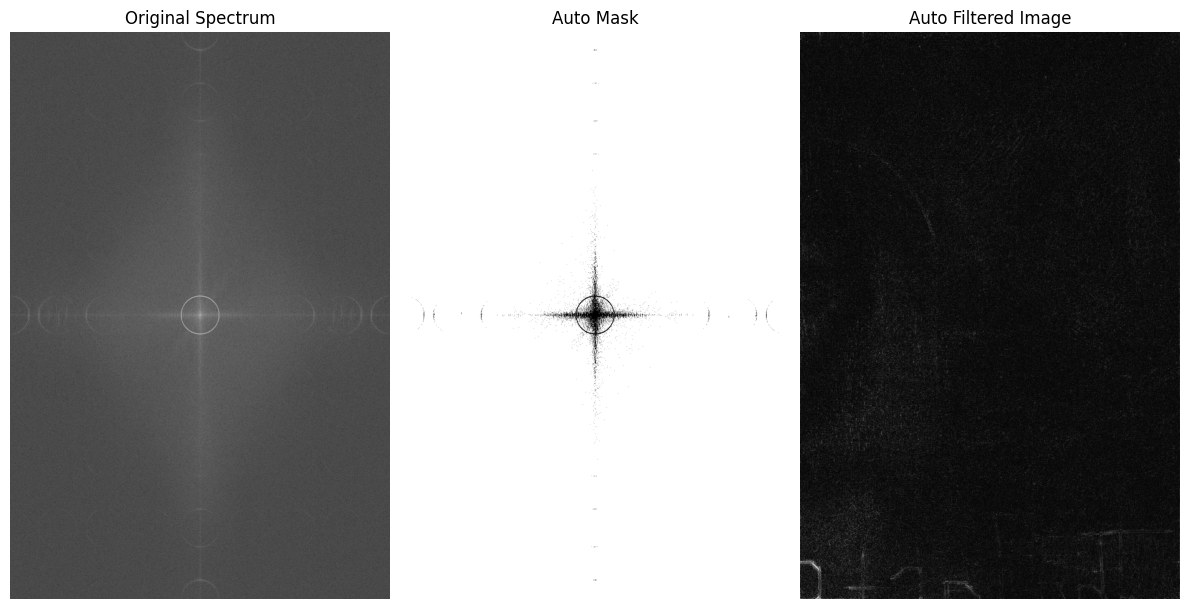

In [9]:
# مرحله ۱: ساخت ماسک خودکار با آستانه روشنایی
magnitude = np.abs(fshift)
threshold = np.percentile(magnitude, 99.5)  # فقط 0.5٪ روشن‌ترین نقاط حذف میشن

# ساخت ماسک
auto_mask = (magnitude < threshold).astype(np.uint8)

# مرحله ۲: اعمال ماسک روی طیف
fshift_auto_filtered = fshift * auto_mask

# مرحله ۳: تبدیل معکوس
f_ishift = np.fft.ifftshift(fshift_auto_filtered)
img_auto_filtered = np.fft.ifft2(f_ishift)
img_auto_filtered = np.abs(img_auto_filtered)

# نمایش نتایج
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Original Spectrum")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(auto_mask * 255, cmap='gray')
plt.title("Auto Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_auto_filtered, cmap='gray')
plt.title("Auto Filtered Image")
plt.axis('off')

plt.tight_layout()
plt.show()
